In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Cleaned_NSUT.xlsx       
  inflating: FINAL_ITO_DATA.xlsx     
  inflating: final_dataset.csv       


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("final_dataset.csv")

df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149



Cet ensemble de données contient les relevés quotidiens des concentrations de polluants atmosphériques, notamment les PM2,5, PM10, NO₂, SO₂, CO et l'ozone. Il enregistre également l'indice de qualité de l'air (IQA), la date (jour, mois, année), le nombre de jours fériés et la répartition des jours de la semaine. Il est idéal pour développer des modèles de prédiction de l'IQA, étudier les profils de pollution et analyser l'impact des variations temporelles et des jours fériés sur la qualité de l'air.

Vacances

1 : Oui

0 :- Pas de jours fériés (travail)

Jours

Lundi
Mardi
Mercredi
Jeudi
Vendredi
Samedi
Dimanche
Unité des paramètres : Tous les paramètres sont en (µg/m³) SAUF CO, dont l'unité est (mg/m³)

In [ ]:
df.shape

(1461, 12)

In [ ]:
# verification des valeurs manquantes
df.isnull().sum()

,0
Date,0
Month,0
Year,0
Holidays_Count,0
Days,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0


In [ ]:
# Definition de la cible de prediction
y = df["AQI"]

In [ ]:
# Definition des features
X = df.drop("AQI", axis=1)

In [ ]:
# Séparer Train / Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Premier modèle : Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
# Interpretation
import numpy as np

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 39.174570341524124
R2 Score: 0.8817375049982547


## Deuxième modèle : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


rf_model = RandomForestRegressor(random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


In [ ]:
# Evaluation du model
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest RMSE: 29.004042680441525
Random Forest R2 Score: 0.9351730447572801


## Troisième modèle : Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Instanciation du modèle Gradient Boosting
gbr_model = GradientBoostingRegressor(random_state=42)

# Entraînement du modèle
gbr_model.fit(X_train, y_train)

# Réalisation des prédictions
y_pred_gbr = gbr_model.predict(X_test)



In [ ]:
# Évaluation du modèle
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("Gradient Boosting R2 Score:", r2_score(y_test, y_pred_gbr))

Gradient Boosting RMSE: 26.873682891098188
Gradient Boosting R2 Score: 0.9443464426209756


## Quatrième modèle : XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Instanciation du modèle XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)

# Entraînement du modèle
xgb_model.fit(X_train, y_train)

# Réalisation des prédictions
y_pred_xgb = xgb_model.predict(X_test)



In [ ]:
# Évaluation du modèle
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R2 Score:", r2_score(y_test, y_pred_xgb))

XGBoost RMSE: 29.770667838901748
XGBoost R2 Score: 0.9317007660865784


## Comparaison Visuelle des Performances des Modèles

/tmp/ipython-input-3792195402.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Modèle', data=model_performance, palette='viridis')
/tmp/ipython-input-3792195402.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Modèle', data=model_performance, palette='magma')


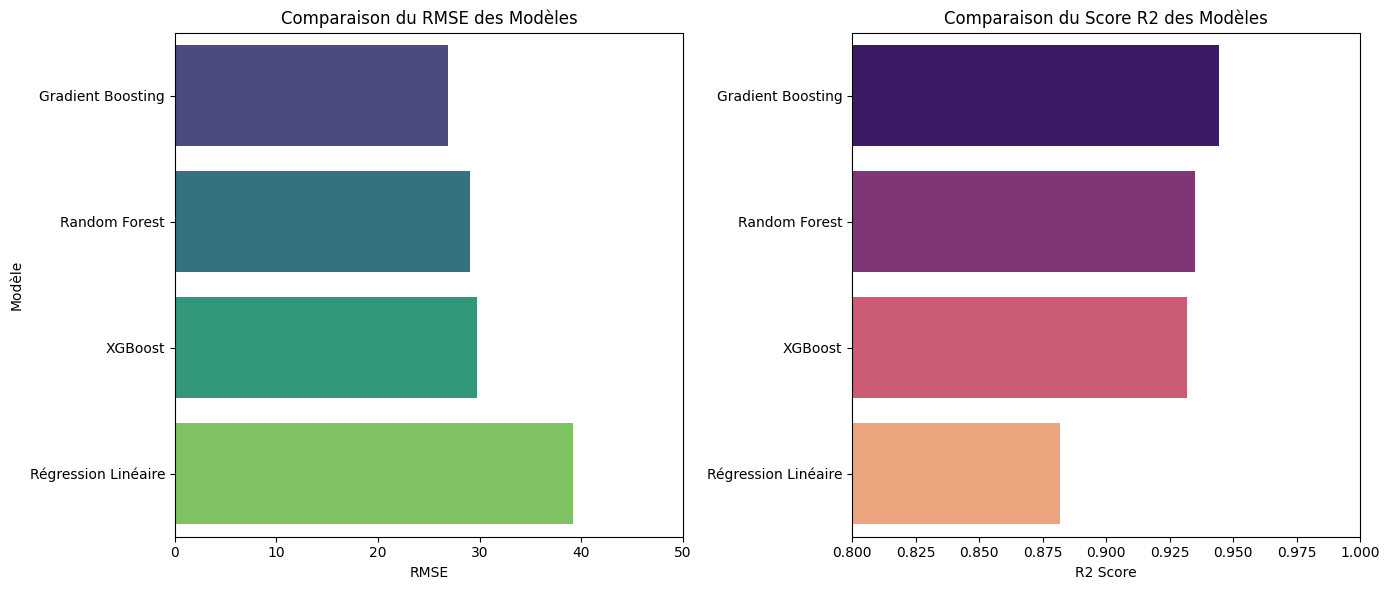

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'un DataFrame pour stocker les résultats des modèles
model_performance = pd.DataFrame({
    'Modèle': ['Régression Linéaire', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'RMSE': [39.17, 29.00, 26.87, 29.77],
    'R2 Score': [0.8817, 0.9351, 0.9443, 0.9317]
})

# Tri par RMSE pour une meilleure visualisation des meilleurs modèles
model_performance = model_performance.sort_values(by='RMSE', ascending=True)

plt.figure(figsize=(14, 6))

# Graphique pour le RMSE
plt.subplot(1, 2, 1) # 1 ligne, 2 colonnes, premier graphique
sns.barplot(x='RMSE', y='Modèle', data=model_performance, palette='viridis')
plt.title('Comparaison du RMSE des Modèles')
plt.xlabel('RMSE')
plt.ylabel('Modèle')
plt.xlim(0, 50) # Ajuster les limites pour une meilleure lisibilité

# Graphique pour le R2 Score
plt.subplot(1, 2, 2) # 1 ligne, 2 colonnes, deuxième graphique
sns.barplot(x='R2 Score', y='Modèle', data=model_performance, palette='magma')
plt.title('Comparaison du Score R2 des Modèles')
plt.xlabel('R2 Score')
plt.ylabel('') # Laisser vide car déjà sur le premier graphique
plt.xlim(0.8, 1.0) # Ajuster les limites pour mieux voir les différences

plt.tight_layout()
plt.show()

### Interprétation de la Comparaison Visuelle
Les graphiques présentés ci-dessus permettent d’évaluer les performances relatives des différents modèles de prédiction de l’AQI :

RMSE (Erreur Quadratique Moyenne)

Plus le RMSE est faible, meilleure est la précision du modèle.

On constate que le Gradient Boosting présente le RMSE le plus faible, suivi du Random Forest et de XGBoost.

La Régression Linéaire a le RMSE le plus élevé, confirmant sa capacité limitée à capturer les relations complexes entre les polluants et l’AQI.

R² Score (Coefficient de Détermination)

Plus le R² est proche de 1, plus le modèle explique la variance de la variable cible.

Le Gradient Boosting se distingue avec le R² le plus élevé, ce qui indique qu’il capture la majeure partie de la variabilité de l’AQI.

Les modèles Random Forest et XGBoost obtiennent également d’excellents scores R², tandis que la Régression Linéaire reste moins performante.

Conclusion :
Les modèles d’ensemble (Gradient Boosting, Random Forest et XGBoost) surpassent largement la Régression Linéaire pour cette tâche de prédiction. Parmi eux, le Gradient Boosting se révèle être le plus performant, offrant à la fois précision et capacité à expliquer la variabilité des données.

# #Extraction du meillieur model

In [ ]:
gbr_model

GradientBoostingRegressor(random_state=42)

In [ ]:
import joblib

joblib.dump(gbr_model, "gradient_boosting_model.pkl")

['gradient_boosting_model.pkl']

In [ ]:
from google.colab import files
files.download("gradient_boosting_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>